In [1]:
import numpy as np

from fpcross import ij, Grid, Solver, Model, Check

ij()

Start |  1:49PM MSK on Feb 14, 2020 | python 3.7.4    |
-------------------------------------------------------


In [3]:
MD = Model.select('fpe_oup')
MD.init(d=2, s=1., D=0.5, A=np.array([
    [0.5, 0.3],
    [0.8, 2.5],
])).info()

<div class="head0"><div class="head0__name">fpe-oup</div><div class="head0__note">Multidimensional Focker Planck equation (Ornstein–Uhlenbeck process) [FPE, ND, analytic-stationary, OUP].</div></div><div class="head2">
                <div class="head2__name">Parameters</div>
                <div class="head2__note"><ul><li>d =   2 [Dimension]<div>Spatial dimension (type: int, default:   1)</div></li><li>s =   1.0000 [Initial variance]<div>Variance of the initial condition (type: float, default:   1.0000)</div></li><li>D =   0.5000 [Diffusion coefficient]<div>Scalar diffusion coefficient (type: float, default:   0.5000)</div></li><li>A = [[0.5 0.3]
 [0.8 2.5]] [Drift]<div>Constant drift coefficients ([d x d] matrix) (type: ndarray, default: <function Model.pars.<locals>.<lambda> at 0x151eb2fc20>)</div></li></ul></div>
            </div><div class="head1">
                <div class="head1__name">Description</div>
            </div>
Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D I,
$$
and
$$
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) = A (\mu - x),
    \quad
    \mu \equiv 0,
    \quad
    \rho_0(x) =
        \frac{1}{\left(2 \pi s \right)^{\frac{d}{2}}}
        \exp{\left[-\frac{|x|^2}{2s}\right]}.
$$

This equation has stationary solution ($t \rightarrow \infty$)
$$
    \rho_{stat}(x) =
        \frac
        {
            exp \left[ -\frac{1}{2} x^{\top} W^{-1} x \right]
        }
        {
            \sqrt{(2 \pi)^d det(W)}
        },
$$
where matrix $W$ is solution of the matrix equation
$$
    A W + W A^{\top} = 2 D.
$$
        <div class="note">The multivariate Ornstein–Uhlenbeck process is mean-reverting (the solution tends to its long-term mean $\mu$ as time $t$ tends to infinity) if if all eigenvalues of $A$ are positive and this process at any time is a multivariate normal random variable.</div><div class="note">We do not construct analytic solution for this multidimensional case, but use comparison with known stationary solution. The corresponding error will depend on the maximum value for the used time grid.</div><div class="end"></div>

In [3]:
SL = Solver(
    TG=Grid(d=1, n=  200, l=[+0., +8.], k='u'),
    SG=Grid(d=2, n=  127, l=[-6., +6.], k='c'),
    MD=MD, eps=1.E-4, with_tt=True
).init({
    'n_hst': 10,
    'with_rhs': True,
    'with_r_hst': False,
}).prep()

SL.calc()

Solve: 100%|█| 199/199 [10:32<00:00,  5.44s/step, | At T=8.0e+00 :                                                                                                       Edert=1.5e-04  Erhsn=8.5e-03  Estat=4.5e-02 r=8.00e+00]


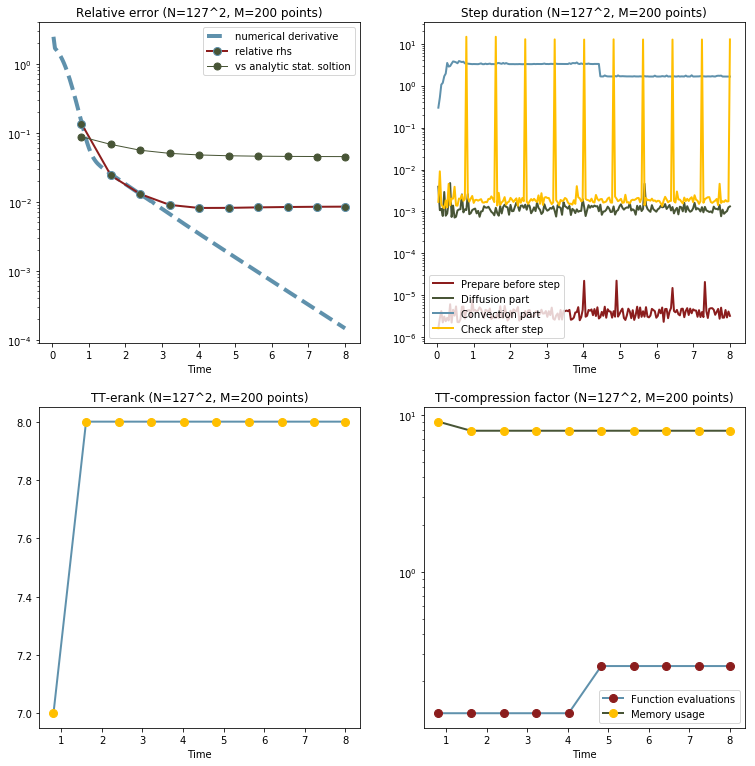

In [4]:
SL.plot()

In [5]:
SL = Solver(
    TG=Grid(d=1, n=  200, l=[+0., +8.], k='u'),
    SG=Grid(d=2, n=  127, l=[-6., +6.], k='c'),
    MD=MD
).init({
    'n_hst': 10,
    'with_rhs': True,
    'with_r_hst': False,
}).prep()

SL.calc()

Solve: 100%|█| 199/199 [09:28<00:00, 10.60s/step, | At T=8.0e+00 :                                                                                                       Edert=1.6e-04  Erhsn=8.4e-03  Estat=4.4e-02]


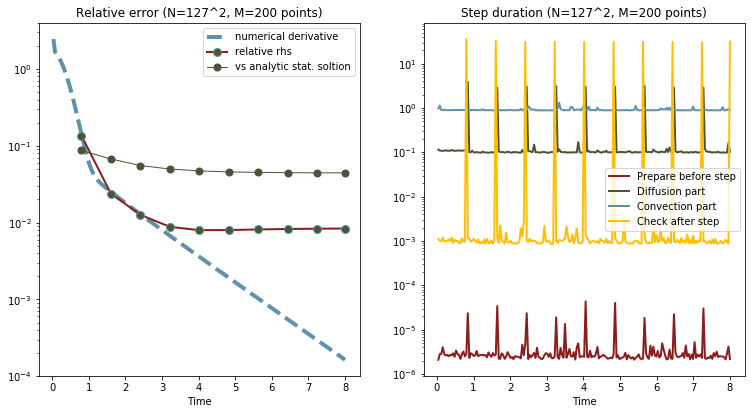

In [6]:
SL.plot()

Solve: 100%|█| 199/199 [10:28<00:00, 12.10s/step, | At T=8.0e+00 :                                                                                                       Edert=1.6e-04  Erhsn=8.4e-03  Estat=4.4e-02]


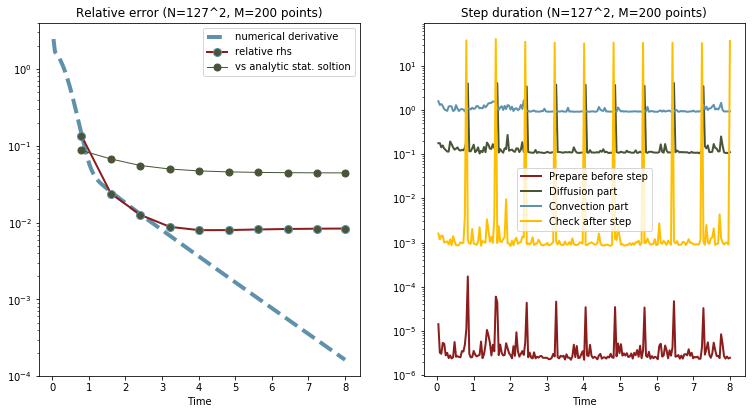

In [3]:
# 20 poi for ord_solver
SL = Solver(
    TG=Grid(d=1, n=  200, l=[+0., +8.], k='u'),
    SG=Grid(d=2, n=  127, l=[-6., +6.], k='c'),
    MD=MD
).init({
    'n_hst': 10,
    'with_rhs': True,
    'with_r_hst': False,
}).prep()

SL.calc()
SL.plot()

Solve: 100%|█| 199/199 [11:58<00:00, 13.25s/step, | At T=8.0e+00 :                                                                                                       Edert=1.6e-04  Erhsn=8.4e-03  Estat=1.6e-03]


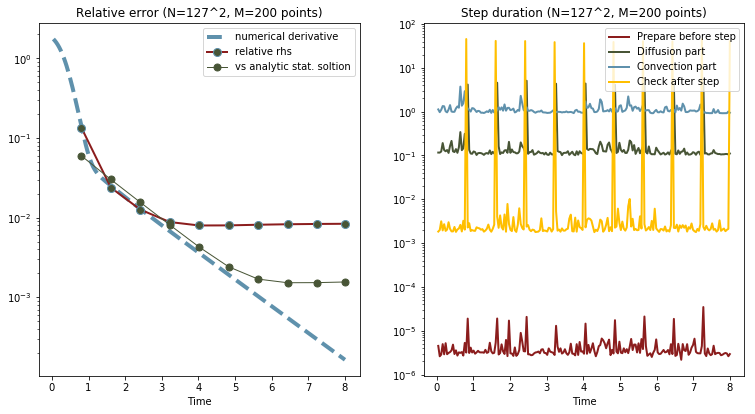

In [3]:
# Integrate after each step and 20 poi for ord_solver
SL = Solver(
    TG=Grid(d=1, n=  200, l=[+0., +8.], k='u'),
    SG=Grid(d=2, n=  127, l=[-6., +6.], k='c'),
    MD=MD
).init({
    'n_hst': 10,
    'with_rhs': True,
    'with_r_hst': False,
}).prep()

SL.calc()
SL.plot()

In [3]:
TG = Grid(d=1, n=200, l=[+0., +8.], kind='u')
SG = Grid(d=2, n=127, l=[-6., +6.], kind='c')
SL = Solver(TG, SG, MD)
SL.init()
SL.prep()
SL.calc()
SL.info()

Solve: 100%|███| 199/199 [04:11<00:00,  2.87s/step, | At T=8.0e+00 : es=1.6e-03]

------------------ Solver
Format    : 2D, NP [order=2]
Time sec  : prep = 8.13e+00, calc = 2.15e+02
Err stat  : 1.56e-03


In [3]:
TG = Grid(d=1, n=200, l=[+0., +8.], kind='u')
SG = Grid(d=2, n=127, l=[-6., +6.], kind='c')
SL = Solver(TG, SG, MD, with_tt=True)
SL.init()
SL.prep()
SL.calc()
SL.info()

Solve:  62%|█▊ | 123/199 [05:05<04:07,  3.25s/step, | At T=4.8e+00 : es=3.0e+00]

KeyboardInterrupt: 

In [ ]:
SL.plot()

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_tm([-3.]*d, opts)
SL.plot_tm([+0.]*d, opts)
SL.plot_tm([+3.]*d, opts)

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_sp(+0.1, opts)
SL.plot_sp(+0.5, opts)
SL.plot_sp(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see file `multi_solve.ipynb`).
    </div>
</div>

In [ ]:
SLC = SolversCheck('./../computations/data/fpe_2d_oup')
SLC.load()

name1 = 'Solver-NP'
name2 = 'Solver-TT'

M = SLC.res[name2]['M']
N = SLC.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, n=n, is_stat=False, is_xpoi=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for TT-solver of the 2th order.
    </div>
</div>

In [ ]:
SLC.plot(name2, m=m, is_stat=False, is_xpoi=False, lims={ 'all': [1, 6] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver type
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solver and TT-solver.
    </div>
</div>

In [ ]:
SLC.plot_all(n=n, is_stat=False, is_xpoi=False)

In [ ]:
SLC.plot_all(m=m, is_stat=False, is_xpoi=False)

<div class="head1">
    <div class="head1__name">
        DRAFT | Explicit (simple) solvers
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [7]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

In [8]:
d = 3
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [10]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.show()

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)

<div class="head2">
    <div class="head2__name">
        Euler solver and uniform spatial grid
    </div>
</div>

We can solve this 1D equation on the uniform spatial grid for the time $t > 0$ with step $h$ and uniform spatial grid with step $l$ using 2th order finite difference scheme

$$
    \frac{\partial \rho}{\partial t} = (D + \widehat{Q}) \rho,
$$
where
$$
    \widehat{Q} \rho = f Q \rho - \frac{\partial f}{\partial x} \rho,
$$

$$
    D = \frac{1}{l^2} tridiag \left( 1, -2, 1 \right),
    \quad
    Q = \frac{1}{2 l} tridiag \left( -1, 0, 1 \right).
$$

Let apply 1th order splitting method on the time step $(k+1)$
$$
    \frac{\partial v}{\partial t} = D v,
    \quad
    v_{k} = \rho_{k},
    \quad
    v_{k+1} = v = ?,
$$
$$
    \frac{\partial w}{\partial t} = \widehat{Q} w,
    \quad
    w_{k} = v,
    \quad
    w_{k+1} = \rho_{k+1} = ?,
$$
and solve both ODE by the 1th order Euler method.

In [14]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)
X = [X.copy() for _ in range(d)]
X = np.meshgrid(*X, indexing='ij')
X = np.array(X).reshape((d, -1), order='F')

I = np.eye(x_poi)

Q = sp.spdiags(
    [
        [-1.] * x_poi,
        [+1.] * x_poi
    ],
    [-1,  1], x_poi, x_poi
).tocsr().toarray()
Q = Q * (0.5 / l)
Q = np.kron(Q, np.kron(I, I)) + np.kron(I, np.kron(Q, I)) + np.kron(I, np.kron(I, Q))

D = sp.spdiags(
    [
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ],
    [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l
D = np.kron(D, np.kron(I, I)) + np.kron(I, np.kron(D, I)) + np.kron(I, np.kron(I, D))

r = func_r0(X)

print(x_poi)
print(x_poi**d)
print(D.shape)
print(Q.shape)
print(r.shape)

for t in T[1:]:
    F0 = np.diag(func_f0(X, t).reshape(-1))
    F1 = np.diag(func_f1(X, t).reshape(-1))
    w0 = r
    w1 = w0 + h * D @ w0
    # w1 = ZD @ w0
    v0 = w1
    v1 = v0 - h * F0 @ Q @ v0 - h * F1 @ v0
    r = v1
    
show_x(X, r.reshape(-1), time.time() - _time)

11
1331
(1331, 1331)
(1331, 1331)
(1331,)


ValueError: shapes (3993,3993) and (1331,1331) not aligned: 3993 (dim 1) != 1331 (dim 0)

In [ ]:
_time = time.time()



r = func_r0(X)
for t in T[1:]:
    r = r + h * D @ r

show_x(X, r, time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Check stationary solution
    </div>
</div>

We calculate rhs (for the large value $\tau$ of time)
$$
    rhs(x)
    =
    \sum_{i=1}^d \sum_{j=1}^d
        \frac{\partial^2}{\partial x_i \partial x_j}
        \left[ D_{ij}(x, \tau) \rho_{stat}(x) \right]
    - \sum_{i=1}^d
        \frac{\partial}{\partial x_i}
        \left[ f_i(x, \tau) \rho_{stat}(x) \right],
$$
using Chebyshev grid and Chebyshev differential matrices ($D_1$, $D_2$)
$$
    \begin{split}
        rhs
        & =
        D_c (D_2 \otimes I \otimes \ldots \otimes I) \rho_{stat} +
        \ldots +
        D_c (I \otimes I \otimes \ldots \otimes D_2) \rho_{stat} -
        \\ & -
        (D_1 \otimes I \otimes \ldots \otimes I) ( f_1 \rho_{stat} ) -
        \ldots -
        (I \otimes I \otimes \ldots \otimes D_1) ( f_d \rho_{stat} ),
    \end{split}
$$
and check if it close to zero.

In [41]:
def func_f0(x, t):
    return -A_coef @ x

def func_f1(x, t):
    return -A_coef @ np.ones(x.shape)

def func_r0(x):
    a = 2. * s_coef
    r = np.exp(-np.sum(x*x, axis=0) / a) / (np.pi * a)**(d/2)
    return r.reshape(-1)

def func_rs(x):
    r = np.exp(-0.5 * np.diag(x.T @ Wi_coef @ x))
    r/= np.sqrt(2**d * np.pi**d * Wd_coef)
    return r

In [72]:
d = 2
s_coef = 1.
D_coef = 100.
A_coef = np.array([
    [1., 0.],
    [0., 1.],
])
W_coef = solve_lyapunov(A_coef, D_coef * 2. * np.eye(d))
Wi_coef = np.linalg.inv(W_coef)
Wd_coef = np.linalg.det(W_coef)

t_min, t_max, t_poi = +0., +5., 100
x_min, x_max, x_poi = -3., +3., 11

rhs_calc, x = calc_fpe_rhs(2, 10., -1, 1, 10, func_f0, func_rs, D_coef)
print('Res. norm2 : %-8.2e'%np.linalg.norm(rhs_calc))

Res. norm2 : 3.72e-14


In [73]:
rhs_calc

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.76035355e-16,
       -3.16413562e-15, -2.78076173e-15, -8.62634617e-15, -8.62808089e-15,
       -1.89258331e-15, -3.16500298e-15,  8.77770079e-16,  0.00000000e+00,
        0.00000000e+00, -4.99600361e-16, -5.11569953e-15, -4.09828421e-15,
       -1.82969959e-15, -2.71917905e-15, -4.54280710e-15, -5.11656689e-15,
       -7.60329300e-15,  0.00000000e+00,  0.00000000e+00, -1.89431804e-15,
       -4.98559527e-15, -1.02348685e-16, -1.96240593e-15, -2.85318644e-15,
       -1.01915004e-16, -4.98386055e-15, -7.21905175e-15,  0.00000000e+00,
        0.00000000e+00,  6.99960923e-16, -3.16153353e-15, -8.53483950e-16,
        1.15532584e-15,  4.33680869e-17, -8.54784993e-16, -2.27248775e-15,
        6.99960923e-16,  0.00000000e+00,  0.00000000e+00,  1.58640462e-15,
       -4.05144668e-15, -

In [5]:
from intertrain import Intertrain

t_min, t_max, t_poi = +0., +5., 100
x_min, x_max, x_poi = -3., +3., 7

IT = Intertrain(n=[x_poi]*d, l=[[-3., 3.], [-3., 3.]], with_tt=False)

I0 = np.eye(x_poi)
J0 = np.eye(x_poi); J0[0, 0] = 0.; J0[-1, -1] = 0.
D1 = IT.dif1()
D2 = IT.dif2()

t = 1000.
x = IT.grid()
f = func_f0(x, t)
r = IT.init(func_rs).Y.reshape(-1, order='F')

rhs = D_coef * np.kron(D2, I0) @ r
rhs+= D_coef * np.kron(I0, D2) @ r
rhs-= np.kron(D1, I0) @ (f[0, :] * r)
rhs-= np.kron(I0, D1) @ (f[1, :] * r)
rhs = np.kron(J0, J0) @ rhs

print('Norm of rho : %-8.2e'%(np.linalg.norm(r) / (x_max - x_min)**d))
print('Norm of rhs : %-8.2e'%(np.linalg.norm(rhs) / (x_max - x_min)**d))

ValueError: cannot reshape array of size 2401 into shape (7,7)

Solve:  10%|███▎                             | 99/999 [00:20<00:36, 24.37step/s]

In [13]:
from intertrain import Intertrain

def calc_fpe_rhs(d, t, x_min, x_max, x_poi, func_f, func_r, Dc):
    _n = [x_poi]*d
    _l = []
    for _ in range(d): _l.append([x_min, x_max])
    IT = Intertrain(n=_n, l=_l, with_tt=False)
    
    I0 = np.eye(x_poi)
    J0 = np.eye(x_poi); J0[0, 0] = 0.; J0[-1, -1] = 0.
    D1 = IT.dif1()
    D2 = IT.dif2()
    
    x = IT.grid()
    f = func_f(x, t)
    r = func_r(x)
    #r = IT.init(func_r).Y.reshape(-1, order='F')
    
    rhs = Dc * np.kron(D2, I0) @ r
    rhs+= Dc * np.kron(I0, D2) @ r
    rhs-= np.kron(D1, I0) @ (f[1, :] * r)
    rhs-= np.kron(I0, D1) @ (f[0, :] * r)
    rhs = np.kron(J0, J0) @ rhs
    
    return rhs.reshape(-1), x

In [14]:
def func_f(x, t):
    return np.vstack([x[1, :], x[0, :]])

def func_r(x):
    return x[0, :]**2 * x[1, :]**2

def func_rhs(x):
    rhs = Dc * 2. * x[1, :]**2
    rhs+= Dc * 2. * x[0, :]**2
    rhs-= 2. * x[0, :] * x[1, :]**3
    rhs-= 2. * x[1, :] * x[0, :]**3
    return rhs

Dc = 1.

rhs_calc, x = calc_fpe_rhs(2, 10., -1., 1., 5, func_f, func_r, Dc)
rhs_real = func_rhs(x)
err = np.linalg.norm(rhs_calc - rhs_real) / np.linalg.norm(rhs_real)

print('Res. norm2 : %-8.2e'%np.linalg.norm(rhs_calc))
print('Rel. error : %-8.2e'%err)

Res. norm2 : 4.90e+00
Rel. error : 9.56e-01


In [32]:
rhs_calc

array([-2.00000000e+00, -5.10702591e-15,  2.00000000e+00,  4.44089210e-16,
       -2.00000000e+00, -5.10702591e-15,  5.00000000e-01,  1.00000000e+00,
        5.00000000e-01, -5.55111512e-15,  2.00000000e+00,  1.00000000e+00,
        1.49975978e-32,  1.00000000e+00,  2.00000000e+00,  4.44089210e-16,
        5.00000000e-01,  1.00000000e+00,  5.00000000e-01, -1.99840144e-15,
       -2.00000000e+00, -5.55111512e-15,  2.00000000e+00, -1.99840144e-15,
       -2.00000000e+00])

In [33]:
rhs_real

array([0.00000000e+00, 8.78679656e-01, 2.00000000e+00, 5.12132034e+00,
       8.00000000e+00, 8.78679656e-01, 1.00000000e+00, 1.00000000e+00,
       3.00000000e+00, 5.12132034e+00, 2.00000000e+00, 1.00000000e+00,
       1.49975978e-32, 1.00000000e+00, 2.00000000e+00, 5.12132034e+00,
       3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.78679656e-01,
       8.00000000e+00, 5.12132034e+00, 2.00000000e+00, 8.78679656e-01,
       0.00000000e+00])

In [ ]:


t_min, t_max, t_poi = +0., +5., 100
x_min, x_max, x_poi = -3., +3., 7

IT = Intertrain(n=[x_poi]*d, l=[[-3., 3.], [-3., 3.]], with_tt=False)

I0 = np.eye(x_poi)
J0 = np.eye(x_poi); J0[0, 0] = 0.; J0[-1, -1] = 0.
D1 = IT.dif1()
D2 = IT.dif2()

t = 1000.
x = IT.grid()
f = func_f0(x, t)
r = IT.init(func_rs).Y.reshape(-1, order='F')

rhs = D_coef * np.kron(D2, I0) @ r
rhs+= D_coef * np.kron(I0, D2) @ r
rhs-= np.kron(D1, I0) @ (f[0, :] * r)
rhs-= np.kron(I0, D1) @ (f[1, :] * r)
rhs = np.kron(J0, J0) @ rhs

print('Norm of rho : %-8.2e'%(np.linalg.norm(r) / (x_max - x_min)**d))
print('Norm of rhs : %-8.2e'%(np.linalg.norm(rhs) / (x_max - x_min)**d))

<div class="head1">
    <div class="head1__name">
        TMP
    </div>
</div>

In [ ]:
r_calc = SL.IT.Y.reshape(-1, order='F')
r_real = func_rs(SL.IT.grid())

<div class="end"></div>